Gabriel Riegner: 14 FEB 2024  

##### Homework Assignment 4

---

##### 1. Power Law

(a) Introducing click counts will likely incline people to select links with already high view counts, because people tend to copy the decisions of others who act before them. This is an example of the "rich-get-richer" phenomenon.

(b) The addition of view counters would likely cause the popularity distribution to follow a power law more closely. Power laws arise from feedback introduced by correlated decisions across a population, eventually creating a degree distribution with many items with few links and a few items with many links.

##### 2. Graph visualization - Cora

Scientific publications:	2708
Citation network links:		5429


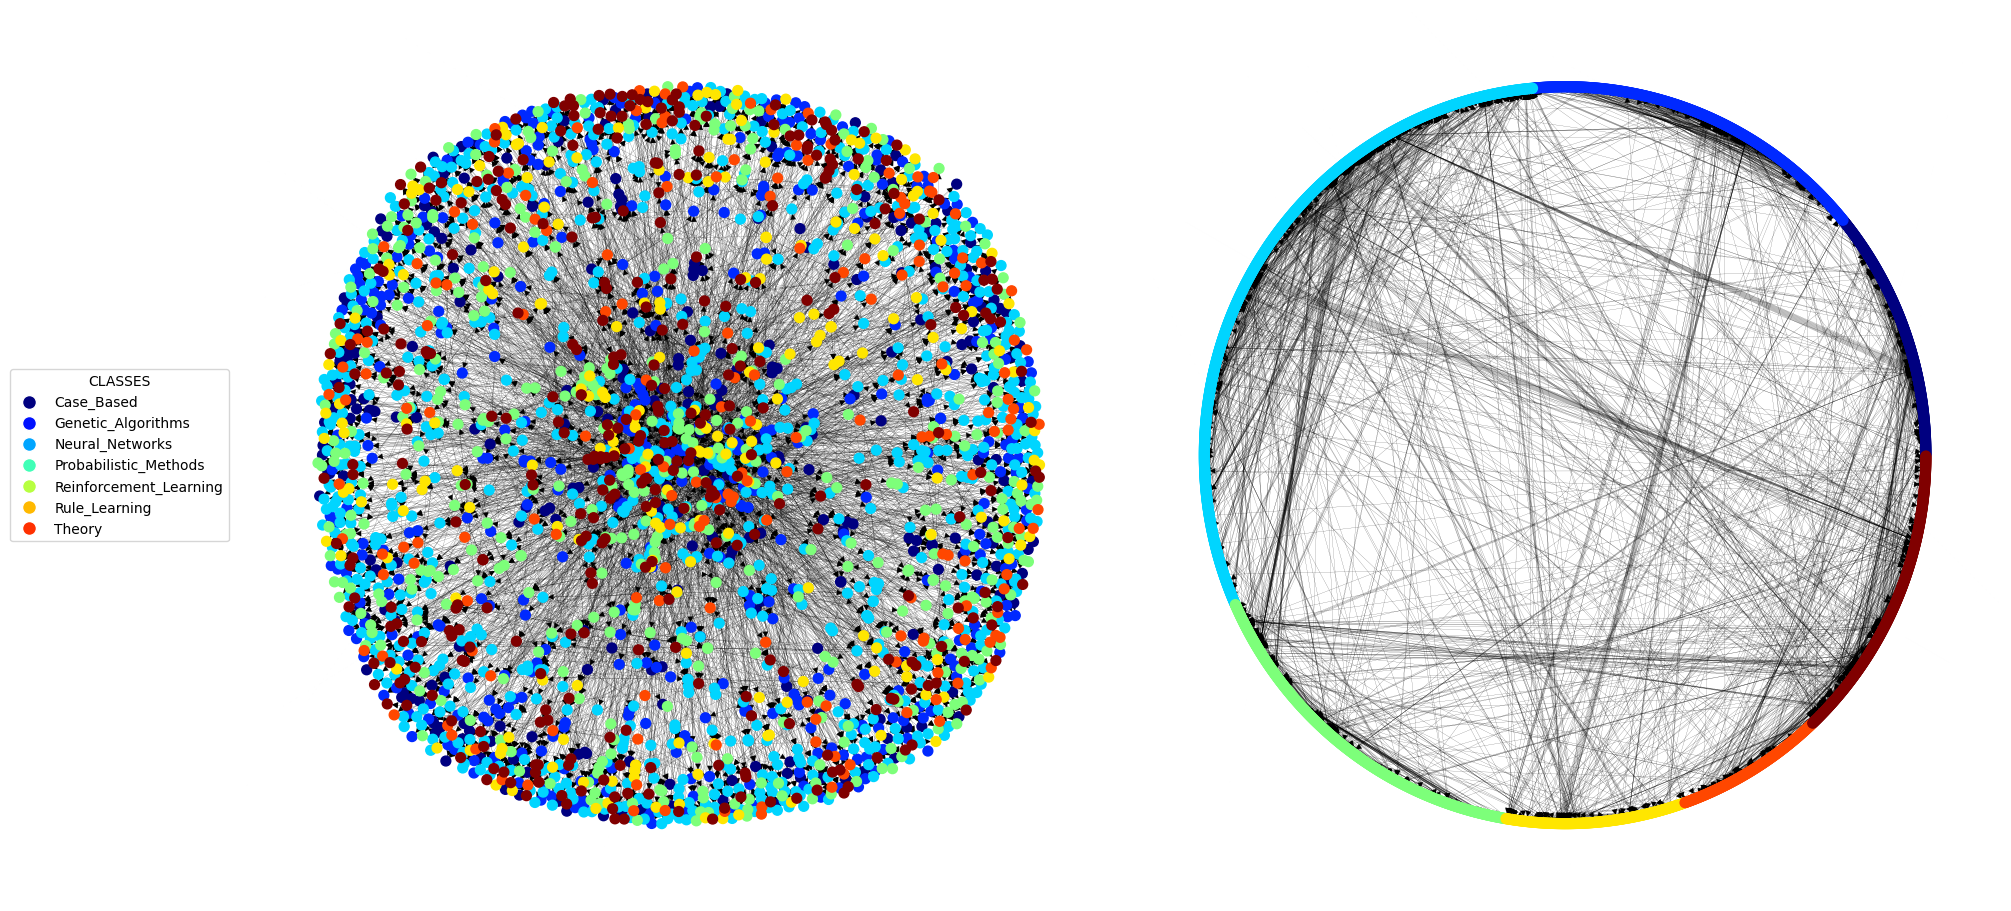

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read citation and publication class data
df_cites = pd.read_csv("hw4-cora.cites", names=["cited", "cites"], sep="\t")
df_content = pd.read_csv(
    "hw4-cora.content", usecols=[0, 1434], names=["id", "class"], sep="\t", index_col="id"
)["class"]

# build the directed graph and set the "class" attribute
G = nx.from_pandas_edgelist(df_cites, source="cited", target="cites", create_using=nx.DiGraph())
nx.set_node_attributes(G, df_content.to_dict(), "class")

print(f"Scientific publications:\t{G.number_of_nodes()}")
print(f"Citation network links:\t\t{G.number_of_edges()}")

# define a color map for classes and create a circular layout
unique_classes = sorted(df_content.unique())
color_map = {cls: idx for idx, cls in enumerate(unique_classes)}
sorted_nodes = sorted(G.nodes, key=lambda n: color_map[G.nodes[n]["class"]])
node_colors = [color_map[G.nodes[n]["class"]] for n in sorted_nodes]
angles = np.linspace(0, 2 * np.pi, len(sorted_nodes), endpoint=False)
pos = {node: (np.cos(angle), np.sin(angle)) for node, angle in zip(sorted_nodes, angles)}

# plot the network
# fmt: off
fig, axs = plt.subplots(ncols=3, figsize=(20, 9), layout="constrained",  gridspec_kw=dict(width_ratios=[0.5, 2, 2]))

legend_handles = [
    plt.Line2D([0], [0], marker="o", color="w",
               markerfacecolor=plt.cm.jet(color_map[cls] / len(unique_classes)),
               markersize=10)
    for cls in unique_classes
]
axs[0].legend(legend_handles, unique_classes, title="CLASSES", loc="center")
axs[0].axis("off")

nx.draw(G, nx.spring_layout(G), nodelist=sorted_nodes, node_color=node_colors, with_labels=False,
        node_size=50, width=0.1, cmap=plt.cm.jet, ax=axs[1])

nx.draw(G, pos, nodelist=sorted_nodes, node_color=node_colors, with_labels=False,
        node_size=50, width=0.1, cmap=plt.cm.jet, ax=axs[2])